In [1]:
# supress the display of warning messages
import warnings
warnings.filterwarnings('ignore')

# Install libraries

In [2]:
pip install --pre pycaret=="3.0.0rc3"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import libraries, import the data, explore the data

In [3]:
import os
import requests
import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.


In [4]:
# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# cross validation
from sklearn.model_selection import train_test_split, cross_validate,\
GridSearchCV, cross_val_score, KFold, ParameterGrid

# metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support,\
accuracy_score, recall_score, precision_score, f1_score,\
confusion_matrix, classification_report

# classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [5]:
# Mount the drive - Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&format=csv"
r = requests.get(url)
r = r.content
df = pd.read_csv(io.StringIO(r.decode('utf-8')))

In [7]:
len(df)

9564

In [8]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2673 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

# Clean the data

We can drop the columns that have no data.

In [10]:
df.drop(columns=['kepler_name', 'koi_teq_err1', 'koi_teq_err2', 'koi_kepmag_err'], inplace=True)

Let's drop 'koi_score' for the time being, due to missing data. We can try different imputation methods later.

In [11]:
df.drop(columns=['koi_score'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   koi_disposition    9564 non-null   object 
 3   koi_pdisposition   9564 non-null   object 
 4   koi_fpflag_nt      9564 non-null   int64  
 5   koi_fpflag_ss      9564 non-null   int64  
 6   koi_fpflag_co      9564 non-null   int64  
 7   koi_fpflag_ec      9564 non-null   int64  
 8   koi_period         9564 non-null   float64
 9   koi_period_err1    9110 non-null   float64
 10  koi_period_err2    9110 non-null   float64
 11  koi_time0bk        9564 non-null   float64
 12  koi_time0bk_err1   9110 non-null   float64
 13  koi_time0bk_err2   9110 non-null   float64
 14  koi_impact         9201 non-null   float64
 15  koi_impact_err1    9110 non-null   float64
 16  koi_impact_err2    9110 

For simplicity, and to get a baseline model, let's remove the remaning rows that have nulls. It should be noted that any rows we choose to remove are rows that our model will not have the opportunity to learn from. In this case, it will only reduce our data by about 8.5%. This is an area to revisit; exploring different ways we can impute missing data.

In [13]:
# drop remaining nulls
df.dropna(inplace=True)

In [14]:
df.shape

(8744, 45)

For clarity, let's replace the abbreviated column names with their complete names. Column descriptions can be found at: https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html#defcols

In [15]:
# replace abbreviated column names with complete names for clarity
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})

In [16]:
# Remove special characters from column names for processing
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [17]:
df.columns

Index(['KepID', 'KOIName', 'ExoplanetArchiveDisposition',
       'DispositionUsingKeplerData', 'NotTransitLikeFalsePositiveFlag',
       'koi_fpflag_ss', 'CentroidOffsetFalsePositiveFlag',
       'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
       'OrbitalPerioddays', 'OrbitalPeriodUpperUncdays',
       'OrbitalPeriodLowerUncdays', 'TransitEpochBKJD',
       'TransitEpochUpperUncBKJD', 'TransitEpochLowerUncBKJD',
       'ImpactParamete', 'ImpactParameterUpperUnc', 'ImpactParameterLowerUnc',
       'TransitDurationhrs', 'TransitDurationUpperUnchrs',
       'TransitDurationLowerUnchrs', 'TransitDepthppm',
       'TransitDepthUpperUncppm', 'TransitDepthLowerUncppm',
       'PlanetaryRadiusEarthradii', 'PlanetaryRadiusUpperUncEarthradii',
       'PlanetaryRadiusLowerUncEarthradii', 'EquilibriumTemperatureK',
       'InsolationFluxEarthflux', 'InsolationFluxUpperUncEarthflux',
       'InsolationFluxLowerUncEarthflux', 'TransitSignaltoNois',
       'TCEPlanetNumbe', 'TCEDeliver',

# Explore categorical variables
Next we can check for any extreme class imbalances in the categorical features.

In [18]:
df['NotTransitLikeFalsePositiveFlag'].value_counts()

0      7606
1      1137
465       1
Name: NotTransitLikeFalsePositiveFlag, dtype: int64

In [19]:
df.koi_fpflag_ss.value_counts()

0    6622
1    2122
Name: koi_fpflag_ss, dtype: int64

In [20]:
df.CentroidOffsetFalsePositiveFlag.value_counts()

0    6965
1    1779
Name: CentroidOffsetFalsePositiveFlag, dtype: int64

In [21]:
df.EphemerisMatchIndicatesContaminationFalsePositiveFlag.value_counts()

0    7651
1    1093
Name: EphemerisMatchIndicatesContaminationFalsePositiveFlag, dtype: int64

# Creating the target variable
Before it was discontinued in 2018 the Kepler telescope discovered thousands of planets outside of our solar system. It accomplished this by looking for small dips in the brightness of a star when a planet transitted in front of it.

The column 'ExoplanetCandidate' indicates whether or not an observation from the Kepler telescope is a potential exoplanet.

Let's create a numeric version of 'ExoplanetCandidate' as our target variable.

In [22]:
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 'Yes' if x == 'CANDIDATE' else 'No')

We can drop columns that won't be of any use to the model.

In [23]:
df.drop(columns=['KOIName', 'KepID', 'ra_str', 'dec_str', 
                 'ExoplanetArchiveDisposition', 'DispositionUsingKeplerData', 'TCEDeliver'], inplace=True)


Distribution of the target variable

In [24]:
# distribution of the target variable
target_counts = df['ExoplanetCandidate'].value_counts()
target_counts

Yes    4524
No     4220
Name: ExoplanetCandidate, dtype: int64

In [25]:
# save the indices from value_counts for use in the print statement below
target_levels = target_counts.index
target_levels

Index(['Yes', 'No'], dtype='object')

In [26]:
print("Out of the potential exoplanet candidates:", "\n")
for i in target_levels:
  print(f"{round(target_counts[i]/len(df)*100, 2)}% is {i}", "\n")

Out of the potential exoplanet candidates: 

51.74% is Yes 

48.26% is No 



# Using PyCaret to get a feel the best performing models
Before we formally test models by breaking the data into a train set, validation set, and test set, we can use the PyCaret package to get an idea for the models that are the highest performing.

In [27]:
# Preliminary training and evaluating of models
experiment = setup(data = df, target = 'ExoplanetCandidate', session_id=123)

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 83c3
INFO:logs:self.variable_keys: {'USI', 'y', 'exp_id', 'fold_generator', '_gpu_n_jobs_param', '_is_multiclass', 'html_param', '_all_models', 'fold_groups_param', 'log_plots_param', 'target_param', 'data', 'pipeline', 'memory', 'y_test', 'X_test', 'gpu_param', 'y_train', 'master_model_container', 'fold_shuffle_param', 'exp_name_log', 'idx', 'n_jobs_param', '_all_models_internal', 'variable_keys', '_available_plots', '_all_metrics', 'X', 'X_train', 'display_container', 'fix_imbalance', 'seed', '_ml_usecase', 'logging_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.15
INFO:logs:python_build: ('default', 'Oct 12 2022 19:14:55')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=1361636147

,Description,Value
0,Session id,123
1,Target,ExoplanetCandidate
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8744, 39)"
5,Transformed data shape,"(8744, 39)"
6,Transformed train set shape,"(6120, 39)"
7,Transformed test set shape,"(2624, 39)"
8,Numeric features,38
9,Preprocess,True


INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 1.85s...............


In [28]:
# Create a leaderboard of the models
best_model = compare_models()

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f4ac7025550>, include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7f4ac7025550>, 'include': None, 'exclude': None, 'fold': None, 'round': 4, 'cross_validation': True, 'sort': 'Accuracy', 'n_select': 1, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9977,0.9996,0.9975,0.9981,0.9978,0.9954,0.9954,0.6170
et,Extra Trees Classifier,0.9975,0.9996,0.9972,0.9981,0.9976,0.9951,0.9951,0.4990
ada,Ada Boost Classifier,0.9974,0.9995,0.9972,0.9978,0.9975,0.9948,0.9948,0.9250
gbc,Gradient Boosting Classifier,0.9972,0.9995,0.9972,0.9975,0.9973,0.9944,0.9944,4.0160
dt,Decision Tree Classifier,0.9966,0.9966,0.9968,0.9965,0.9967,0.9931,0.9931,0.1530
rf,Random Forest Classifier,0.9943,0.9994,0.9908,0.9981,0.9944,0.9886,0.9886,1.4970
qda,Quadratic Discriminant Analysis,0.9907,0.9959,0.9839,0.9981,0.9909,0.9814,0.9815,0.0940
ridge,Ridge Classifier,0.9837,0.0000,0.9972,0.9720,0.9844,0.9672,0.9676,0.0790
lda,Linear Discriminant Analysis,0.9837,0.9982,0.9972,0.9720,0.9844,0.9672,0.9676,0.1150
lr,Logistic Regression,0.8088,0.8857,0.8632,0.7879,0.8238,0.6159,0.6191,1.3720


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 4.792610804239909e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f4ac7025550>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7f4af11b09d0>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() successfully completed......................................


Several classifiers appear to have strong performance. For instructional purposes I will include a list of classifiers with varying levels of performance according to PyCaret.

Since there are a number of models with exceptional performance, we should also find ways to verify that the results are valid.

In [29]:
# Save our list of classifiers to test (default hyperparameters)

clf_list = [LGBMClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), SVC()]
clf_name_list = ['LGBM', 'RF', 'LR', 'KNN', 'SVC']

# Test model performance

PyCaret also has the ability to test predictions. But let's take some of the top models that PyCaret has given us, and do our own testing after dividing the the data into train, validation, and test sets.

In [30]:
 # Encode categorical variables and combine them with the rest of the dataset
 
 def fun_enc(df_name,df): 
    # separate target variable and predictors
    df_target = df['ExoplanetCandidate']
    df_features = df.drop('ExoplanetCandidate', axis=1)

    # Separate numeric and categorical predictors
    df_num_features = df_features.select_dtypes(exclude=['object'])
    df_cat_features = df_features.select_dtypes(include=['object'])

    # Create a transformer object and fit it to cat_features    
    enc = OneHotEncoder(dtype=np.int8, sparse=False)
    df_cat_list = df_cat_features.columns.tolist()
    arr = enc.fit_transform(df_cat_features)

    # Use get_feature_names method of the encoder instance to add dummy variable names
    df_cat_enc = pd.DataFrame(arr, columns=enc.get_feature_names(df_cat_list))

    # Join the encoded categorical features with the numeric features
    df_features_enc = pd.concat([df_cat_enc,df_num_features],axis=1)
    print(f'{df_name} has {df_features_enc.shape[0]} rows, {df_features_enc.shape[1]} columns\n')

    # Drop nulls
    df_features_enc.dropna(inplace=True)

    return df_features_enc, df_target

In [31]:
  # split the data and display the distribution of the target for both the train and test set
  def fun_split_dist(df_name,df_features_enc, df_target, test_pct): 
    # split features and target dataframes into train and test
    X_train, X_test, y_train, y_test = train_test_split(df_features_enc, df_target, test_size=test_pct, random_state=42)

    # Generate y_counts in train and test sets 
    train_y_counts = y_train.value_counts()
    test_y_counts = y_test.value_counts()
   
    # print y distribution in percentage for train and test sets
    print(f'In {df_name} train set:','\n')
    for i in target_levels:
      print(f'{round(100*train_y_counts[i]/X_train.shape[0],2)} percent is {i}','\n')
    
    print(f'In {df_name} test set:','\n') 
    for i in target_levels:
      print(f'{round(100*test_y_counts[i]/X_test.shape[0],2)} percent is {i}','\n')

    # return the four dataframes after the split  
    return X_train, y_train, X_test, y_test;

In [32]:
# Run fun_enc and fun_split_dist on df
df_features_enc, df_target = fun_enc('df', df)
X_train, y_train, X_test, y_test = fun_split_dist('df', df_features_enc, df_target, 0.3)

df has 9498 rows, 38 columns

In df train set: 

51.93 percent is Yes 

48.07 percent is No 

In df test set: 

51.3 percent is Yes 

48.7 percent is No 



In [33]:
# These will be used in the clf_cv_val_test function and in the code that runs the function
test_metric_names = ['accuracy','recall','precision','f1-score']
val_metric_names = ['test_acc','test_recall_n','test_precision_n','test_f1_n','test_recall_y','test_precision_y','test_f1_y']
index_names = ['mean','std']

In [34]:
# Define customized scoring to include per-class metrics using make_scorer
by_class_custom_scoring = {'acc':'accuracy',\
    'recall_n': make_scorer(recall_score, average = None, labels = ["No"]),\
    'recall_y': make_scorer(recall_score, average = None, labels = ["Yes"]),\
    'precision_n': make_scorer(precision_score, average = None, labels = ["No"]),\
    'precision_y': make_scorer(precision_score, average = None, labels = ["Yes"]),\
    'f1_n': make_scorer(f1_score, average = None, labels = ["No"]),\
    'f1_y': make_scorer(f1_score, average = None, labels = ["Yes"])\
}

In [35]:
# An example of generating and saving validation results using cross_validate 
# outside the fun_clf_cv_val_test() function

clf = KNeighborsClassifier()
scores = cross_validate(clf, X_train, y_train, scoring = by_class_custom_scoring)

# Generate means and stds of all of the by_class_custom_scoring metrics
scores_df = pd.DataFrame(scores)
val_mean = scores_df.mean()
val_std = scores_df.std()

# Save the cross validation means and sds as rows in val_results_df
val_results_df = pd.DataFrame(data=(val_mean, val_std), columns=val_metric_names, index=index_names)
val_results_df

,test_acc,test_recall_n,test_precision_n,test_f1_n,test_recall_y,test_precision_y,test_f1_y
mean,0.775654,0.734539,0.785084,0.758919,0.813720,0.768061,0.790196
std,0.007066,0.008921,0.010958,0.007022,0.012206,0.006301,0.007375


In [36]:
# by_class performance results over the five folds
scores_df

,fit_time,score_time,test_acc,test_recall_n,test_recall_y,test_precision_n,test_precision_y,test_f1_n,test_f1_y
0,0.020679,0.449806,0.769608,0.734694,0.801887,0.774194,0.765766,0.753927,0.783410
1,0.013767,0.406705,0.787582,0.739796,0.831761,0.802583,0.775660,0.769912,0.802731
2,0.013369,0.379134,0.776144,0.743197,0.806604,0.780357,0.772590,0.761324,0.789231
3,0.013456,0.378776,0.772059,0.719864,0.820472,0.788104,0.759475,0.752440,0.788796
4,0.013400,0.340220,0.772876,0.735144,0.807874,0.780180,0.766816,0.756993,0.786810


In [37]:
# An example of training a model using the whole train set
# Apply it to test data and generate test confusion matrix and report 
# Save both the validation results and test confusion matrix and report in a dataframe

model = clf.fit(X_train, y_train)
model_name = type(model).__name__ # extract name of the estimator
pred = model.predict(X_test) # save the predictions of the target variable in "pred"

# test_cf_df = pd.DataFrame(confusion_matrix(y_test,pred,labels=y_levels))
# Return a dict type from classification_report
test_report_dict = classification_report(y_test, pred, labels=target_levels,output_dict=True)
test_report_df = round(pd.DataFrame.from_dict(test_report_dict),2)
test_report_df['model_name'] = model_name # this will come in handy later

# Force pandas to make the index - 'Yes' and 'No' into a column
test_report_df.reset_index(drop=False) 

# Now bundle up validation and test results in a single row
cv_val_test_results_df = pd.DataFrame(
    {'model_type':[model_name],'model':[model],\
     'test_report':[test_report_df],'cv_results':[val_results_df]})

In [38]:
test_report_df

,Yes,No,accuracy,macro avg,weighted avg,model_name
precision,0.75,0.79,0.76,0.77,0.77,KNeighborsClassifier
recall,0.82,0.71,0.76,0.76,0.76,KNeighborsClassifier
f1-score,0.78,0.74,0.76,0.76,0.76,KNeighborsClassifier
support,1346.00,1278.00,0.76,2624.00,2624.00,KNeighborsClassifier


In [39]:
# for comparison, this is what the classification report looks like before all the above transposing
print(classification_report(y_test, pred, labels=target_levels))

              precision    recall  f1-score   support

         Yes       0.75      0.82      0.78      1346
          No       0.79      0.71      0.74      1278

    accuracy                           0.76      2624
   macro avg       0.77      0.76      0.76      2624
weighted avg       0.77      0.76      0.76      2624



Evaluate classifier performance

### Can the model generalize? Compare performance with cross validation, and without cross validation

Let's create a function that will give us the average performance of **a single model** using cross validation, and not using cross validation; i.e., the performance of the full training set on the test set. 

Once we have a function that gives us the results from a single model, we can wrap that in another function that evaluates multiple models at once.

In [40]:
# Function to evaluate a single classifier's performance on the validation and test sets
def fun_clf_cv_val_test(clf, clf_name, X_train, y_train, X_test, y_test, kfold):
  
  #### Validation
  # cross_validate an estimator on train data to generate validation performance
  scores = cross_validate(clf, X_train, y_train, cv=kfold, scoring=by_class_custom_scoring)
  
  # create a dataframe with the scores from cross validation
  scores_df = pd.DataFrame(scores)
  val_mean = round(scores_df.mean(),2)
  val_std = round(scores_df.std(),2)
  val_results_df = pd.DataFrame(data=(val_mean,val_std),columns=val_metric_names, index=index_names)
  val_results_df['clf_name'] = clf_name # this will come in handy later in val_results 
  
  #### Test
  # Save the model that was trained using the entire train set
  # This model will be applied to test data
  model = clf.fit(X_train,y_train)
  
  # use model to create predictions on the test set
  pred = model.predict(X_test)

  #test_cf_df = pd.DataFrame(confusion_matrix(y_test,pred,labels=y_levels))
  
  # create a report on the test set performance
  test_report_dict = metrics.classification_report(y_test, pred, labels=target_levels,output_dict=True)
  test_report_df = round(pd.DataFrame.from_dict(test_report_dict),2)
  test_report_df['clf_name'] = clf_name # lets us identify clf_name in test_results later
  test_report_df.reset_index(drop=False) # force pandas to make the index into a column
  
  # Combining dataframes - bundle up the classifier name, validation results and test results in a single row - NESTED DATA
  cv_val_test_results_df = pd.DataFrame({'clf_name':[clf_name],'test_results':[test_report_df],'validate_results':[val_results_df]})
  return cv_val_test_results_df

Below is an example of the "single model" function in action.

In [41]:
kfold = 4

In [42]:
clf_results_df = fun_clf_cv_val_test(KNeighborsClassifier(), 'KNN_Default', X_train, y_train, X_test, y_test, kfold)

In [43]:
print('Validation results:\n')
clf_results_df['validate_results'].iloc[0] # Since this is a nested dataframe, we need to grab the first index of validate_results

Validation results:



,test_acc,test_recall_n,test_precision_n,test_f1_n,test_recall_y,test_precision_y,test_f1_y,clf_name
mean,0.77,0.73,0.79,0.75,0.82,0.76,0.79,KNN_Default
std,0.01,0.01,0.02,0.01,0.02,0.00,0.01,KNN_Default


In [44]:
print('Test results:\n')
clf_results_df['test_results'].iloc[0] #iloc[] selecting rows using numeric indexes

Test results:



,Yes,No,accuracy,macro avg,weighted avg,clf_name
precision,0.75,0.79,0.76,0.77,0.77,KNN_Default
recall,0.82,0.71,0.76,0.76,0.76,KNN_Default
f1-score,0.78,0.74,0.76,0.76,0.76,KNN_Default
support,1346.00,1278.00,0.76,2624.00,2624.00,KNN_Default


In [45]:
# We will use the list of classifiers we declared earlier
clf_list
clf_name_list

['LGBM', 'RF', 'LR', 'KNN', 'SVC']

Now we can create a function that runs the "single model" function on a list of **multiple models.**

In [46]:
# Define the fun_cv_val_multi_clf() function
def fun_cv_val_multi_clf(clf_list,clf_name_list,X_train,y_train,X_test,y_test,kfold):
  multi_clf_results_list = []
  for i in range(0,len(clf_list)):
    # create a dataframe as seen above, this time for each classifier in clf_list
    clf_results_df = fun_clf_cv_val_test(clf_list[i],clf_name_list[i],X_train,y_train,X_test,y_test,kfold) 
    multi_clf_results_list.append(clf_results_df) # add the dataframe to the list
  # force pd.concat() to create a good index
  cv_val_multi_clf_results_df = pd.concat(multi_clf_results_list).reset_index(drop=True)
  return cv_val_multi_clf_results_df

In [47]:
# Run cv_val_multi_clf() for CD_B, clf_list and clf_name_list
cv_val_multi_clf_results_df1 = fun_cv_val_multi_clf(clf_list, clf_name_list, X_train, y_train, X_test, y_test, kfold)

In [48]:
cv_val_multi_clf_results_df1

,clf_name,test_results,validate_results
0,LGBM,Yes No accuracy macro avg...,test_acc test_recall_n test_precision_...
1,RF,Yes No accuracy macro a...,test_acc test_recall_n test_precision_...
2,LR,Yes No accuracy macro a...,test_acc test_recall_n test_precision_...
3,KNN,Yes No accuracy macro a...,test_acc test_recall_n test_precision_...
4,SVC,Yes No accuracy macro a...,test_acc test_recall_n test_precision_...


### Extract the "test" results (non-cross validated results)
Create a function that will give us a dataframe with just test results, not cross validation results, for each classifier.

In [49]:
def fun_multi_clf_test_report(multi_clf_results_df):
  multi_clf_test_report_list = []
  for index, model_row in multi_clf_results_df.iterrows():
    # df.iterrows() yields an index a series (a row) in df
    multi_clf_test_report_list.append(model_row['test_results']) # this gives us a list of dataframes

  multi_clf_test_report_df = pd.concat(multi_clf_test_report_list) # concatenate the dataframes
  multi_clf_test_report_df = multi_clf_test_report_df.reset_index(drop=False)
  multi_clf_test_report_df = multi_clf_test_report_df.rename(columns={"index": "scorer"}) # we will use the scorer name in a filter condition later
  return multi_clf_test_report_df

In [50]:
multi_clf_test_report_df1 = fun_multi_clf_test_report(cv_val_multi_clf_results_df1)

In [51]:
multi_clf_test_report_df1

,scorer,Yes,No,accuracy,macro avg,weighted avg,clf_name
0,precision,1.00,1.00,1.00,1.00,1.00,LGBM
1,recall,1.00,1.00,1.00,1.00,1.00,LGBM
2,f1-score,1.00,1.00,1.00,1.00,1.00,LGBM
3,support,1346.00,1278.00,1.00,2624.00,2624.00,LGBM
4,precision,1.00,0.99,1.00,1.00,1.00,RF
5,recall,0.99,1.00,1.00,1.00,1.00,RF
6,f1-score,1.00,1.00,1.00,1.00,1.00,RF
7,support,1346.00,1278.00,1.00,2624.00,2624.00,RF
8,precision,0.73,0.82,0.77,0.78,0.77,LR
9,recall,0.87,0.66,0.77,0.76,0.77,LR


In [52]:
# create a series clf_name_df to be used in visualizing the results later
clf_name_df = multi_clf_test_report_df1.clf_name[multi_clf_test_report_df1['scorer'].str.match('precision')].reset_index(drop=True)
clf_name_df

0    LGBM
1      RF
2      LR
3     KNN
4     SVC
Name: clf_name, dtype: object

In [53]:
# This is a series showing the test results for accuracy to be used in visualizations later
multi_clf_test_report_df1[multi_clf_test_report_df1['scorer'].str.match('precision')].reset_index(drop=True)['accuracy']

0    1.00
1    1.00
2    0.77
3    0.76
4    0.69
Name: accuracy, dtype: float64

In [54]:
# Let's store that result in a shorter name.
multi_clf_test_report_acc1 = multi_clf_test_report_df1[multi_clf_test_report_df1['scorer'].str.match('precision')].reset_index(drop=True)['accuracy']
multi_clf_test_report_acc1

0    1.00
1    1.00
2    0.77
3    0.76
4    0.69
Name: accuracy, dtype: float64

### Extract the cross validation results
The function will extract the means and standard deviations in separate dataframes

In [55]:
def fun_multi_clf_cv_val_mean_std(cv_val_multi_clf_results_df):
  # start with an empty report list
  multi_clf_val_report_list = []
  
  # Append each report (dataframe) to the list
  for index, model_row in cv_val_multi_clf_results_df.iterrows():
    multi_clf_val_report_list.append(model_row['validate_results'])
  
  # Concatenate the dataframes
  multi_clf_val_report_df = pd.concat(multi_clf_val_report_list)
  multi_clf_val_report_df = multi_clf_val_report_df.reset_index(drop=False)
  multi_clf_val_report_df = multi_clf_val_report_df.rename(columns={"index": "stat_type"})
  
  # separate out the mean and sd for the list of classifiers
  multi_clf_val_mean_df = multi_clf_val_report_df[multi_clf_val_report_df['stat_type'].str.match('mean')].reset_index(drop=True)
  multi_clf_val_std_df = multi_clf_val_report_df[multi_clf_val_report_df['stat_type'].str.match('std')].reset_index(drop=True)
  return multi_clf_val_mean_df, multi_clf_val_std_df

In [56]:
multi_clf_val_mean_df1, multi_clf_val_std_df1 = fun_multi_clf_cv_val_mean_std(cv_val_multi_clf_results_df1)

In [57]:
# the means of cross validation
multi_clf_val_mean_df1

,stat_type,test_acc,test_recall_n,test_precision_n,test_f1_n,test_recall_y,test_precision_y,test_f1_y,clf_name
0,mean,1.00,1.00,1.00,1.00,1.00,1.00,1.00,LGBM
1,mean,0.99,1.00,0.99,0.99,0.99,1.00,0.99,RF
2,mean,0.78,0.71,0.81,0.75,0.85,0.76,0.80,LR
3,mean,0.77,0.73,0.79,0.75,0.82,0.76,0.79,KNN
4,mean,0.70,0.40,0.94,0.56,0.98,0.64,0.77,SVC


In [58]:
# the standard deviations of cross validation
multi_clf_val_std_df1

,stat_type,test_acc,test_recall_n,test_precision_n,test_f1_n,test_recall_y,test_precision_y,test_f1_y,clf_name
0,std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,LGBM
1,std,0.00,0.00,0.01,0.00,0.01,0.00,0.00,RF
2,std,0.01,0.01,0.01,0.01,0.00,0.01,0.01,LR
3,std,0.01,0.01,0.02,0.01,0.02,0.00,0.01,KNN
4,std,0.01,0.01,0.01,0.01,0.01,0.00,0.00,SVC


# Displaying the results

### Create a "wide" dataframe that compares the test vs cross validation

In [59]:
# wide_df will show us the tabular comparisons of test vs cross validation. We will need to rename the columns.
wide_df = pd.concat([clf_name_df, multi_clf_test_report_acc1,multi_clf_val_mean_df1['test_acc'],multi_clf_val_std_df1['test_acc']],axis=1)
print(wide_df) 
# test_acc columns correspond to validate results - mean and std
# accuracy column corresponds to test results

  clf_name  accuracy  test_acc  test_acc
0     LGBM      1.00      1.00      0.00
1       RF      1.00      0.99      0.00
2       LR      0.77      0.78      0.01
3      KNN      0.76      0.77      0.01
4      SVC      0.69      0.70      0.01


In [60]:
# Rename the columns of wide_df
wide_df.columns = ['clf_name','test_set_result','val_set_mean',
                     'val_set_std']
print(wide_df)

  clf_name  test_set_result  val_set_mean  val_set_std
0     LGBM             1.00          1.00         0.00
1       RF             1.00          0.99         0.00
2       LR             0.77          0.78         0.01
3      KNN             0.76          0.77         0.01
4      SVC             0.69          0.70         0.01


### Create a "long" dataframe, in this case comparing accuracy.
We will look at **accuracy** here, since at the moment we have not determined that there should be a higher cost for mis-classifying an actual positive or actual negative. We are also not dealing with imbalanced data.

In [61]:
# Create a long format df 
long_df = pd.DataFrame(columns=['clf_name','overall_accuracy','data_source'])
clf_len = len(clf_list)

# append the test first then the validation data for each classifier
for r in range(0, clf_len):
  long_df = long_df.append({'clf_name':clf_name_list[r],
                            'overall_accuracy': multi_clf_test_report_acc1.iloc[r], 
                            'data_source':'test-set'},ignore_index=True)
  long_df = long_df.append({'clf_name':clf_name_list[r],
                            'overall_accuracy': multi_clf_val_mean_df1.test_acc.iloc[r],
                            'data_source':'val-set'}, ignore_index=True)

long_df

,clf_name,overall_accuracy,data_source
0,LGBM,1.00,test-set
1,LGBM,1.00,val-set
2,RF,1.00,test-set
3,RF,0.99,val-set
4,LR,0.77,test-set
5,LR,0.78,val-set
6,KNN,0.76,test-set
7,KNN,0.77,val-set
8,SVC,0.69,test-set
9,SVC,0.70,val-set


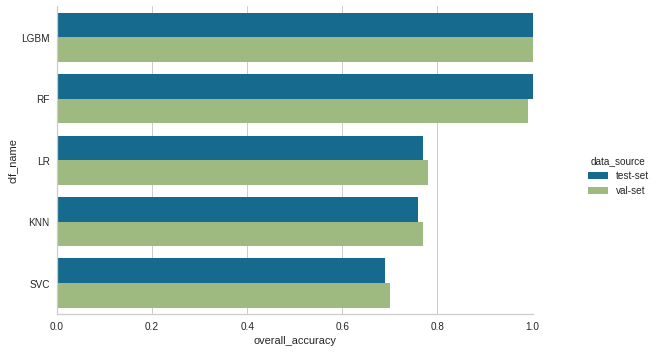

In [62]:
# use seaborn's catplot() to graph the metric's performance on the test set and validation set for each classifier
g = sns.catplot(
    data=long_df, kind="bar",
    y="clf_name", x="overall_accuracy", hue="data_source", orient='h'
)
g.set(xlim = (0.0,1.0))
g.fig.set_figwidth(10)

Create a "mapping" dataframe with references to all the metrics we are interested in.

In [63]:
metric_map = pd.DataFrame(columns=['val_metric','scorer','col','x_label'])
metric_map = metric_map.append({'val_metric' : 'test_acc' , 'scorer' : 'precision','col':'accuracy','x_label':'overall_accuracy'} , ignore_index=True)
metric_map = metric_map.append({'val_metric' : 'test_recall_y' , 'scorer' : 'recall','col':'Yes','x_label':'recall_yes'} , ignore_index=True)
metric_map = metric_map.append({'val_metric' : 'test_recall_n' , 'scorer' : 'recall','col':'No', 'x_label':'recall_no'} , ignore_index=True)
metric_map = metric_map.append({'val_metric' : 'test_precision_y' , 'scorer' : 'precision','col':'Yes','x_label':'precision_yes'} , ignore_index=True)
metric_map = metric_map.append({'val_metric' : 'test_precision_n' , 'scorer' : 'precision','col':'No','x_label':'precision_no'} , ignore_index=True)
metric_map = metric_map.append({'val_metric' : 'test_f1_y' , 'scorer' : 'f1-score','col':'Yes', 'x_label':'f1_yes'} , ignore_index=True)
metric_map = metric_map.append({'val_metric' : 'test_f1_n' , 'scorer' : 'f1-score','col':'No', 'x_label':'f1_no'} , ignore_index=True)
metric_map

,val_metric,scorer,col,x_label
0,test_acc,precision,accuracy,overall_accuracy
1,test_recall_y,recall,Yes,recall_yes
2,test_recall_n,recall,No,recall_no
3,test_precision_y,precision,Yes,precision_yes
4,test_precision_n,precision,No,precision_no
5,test_f1_y,f1-score,Yes,f1_yes
6,test_f1_n,f1-score,No,f1_no


As an example, we can now reference this table to get the scores for a certain metric. For example, we can get the accuracy scores from the cross validation means dataframe we made earlier. 

In [64]:
# accuracy scores for validation means
multi_clf_val_mean_df1[metric_map.val_metric.iloc[0]]

0    1.00
1    0.99
2    0.78
3    0.77
4    0.70
Name: test_acc, dtype: float64

Now we can create a function that iterates through the metrics, and creates wide and long dataframes and visualizations.

This function also allows us to swap out the data and list of classifiers.

In [65]:
# Note comp_name or comparison_name = 'data-source'

def fun_cv_val_test_comparison(clf_name_df,multi_clf_val_mean_df,multi_clf_val_std_df,multi_clf_test_report_df,comp_name):  
  # show tabular comparisons and sns.catplot() of 
  
  # validation and test results by metric
  for i in range(0,len(metric_map.val_metric)):
    val_metric_mean_df = multi_clf_val_mean_df[metric_map.val_metric.iloc[i]]
    val_metric_std_df = multi_clf_val_std_df[metric_map.val_metric.iloc[i]]
    test_metric_df = multi_clf_test_report_df[multi_clf_test_report_df['scorer'].str.match(metric_map.scorer.iloc[i])].reset_index(drop=True)[metric_map.col.iloc[i]]
    
    # create the wide df
    wide_df = pd.concat([clf_name_df,test_metric_df, val_metric_mean_df, val_metric_std_df],axis=1)
    
    # rename the columns
    wide_df.columns = ['clf_name','test_set_result','val_set_mean',
                     'val_set_std']
    print(metric_map.x_label.iloc[i],'from test (left) and from validation in mean and std (right)\n')
    print(wide_df,'\n')
    long_df = pd.DataFrame(columns=['clf_name',metric_map.x_label.iloc[i],comp_name])
    
    # create the long df
    for r in range(0, len(clf_name_df)):
      long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
                            metric_map.x_label.iloc[i]: test_metric_df.iloc[r], 
                            comp_name:'test_set'},ignore_index=True)
      long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
                            metric_map.x_label.iloc[i]: val_metric_mean_df.iloc[r],
                            comp_name:'val_set'}, ignore_index=True)

    # use seaborn's catplot() to draw performance from test-set and val-set 
    # in groups of classifier
    g = sns.catplot(
      data=long_df, kind="bar",
      y="clf_name", x=metric_map.x_label.iloc[i], hue=comp_name, orient='h'
      )
    g.set(xlim=(0.0, 1.0))
    g.fig.set_figwidth(10)

overall_accuracy from test (left) and from validation in mean and std (right)

  clf_name  test_set_result  val_set_mean  val_set_std
0     LGBM             1.00          1.00         0.00
1       RF             1.00          0.99         0.00
2       LR             0.77          0.78         0.01
3      KNN             0.76          0.77         0.01
4      SVC             0.69          0.70         0.01 

recall_yes from test (left) and from validation in mean and std (right)

  clf_name  test_set_result  val_set_mean  val_set_std
0     LGBM             1.00          1.00         0.00
1       RF             0.99          0.99         0.01
2       LR             0.87          0.85         0.00
3      KNN             0.82          0.82         0.02
4      SVC             0.97          0.98         0.01 

recall_no from test (left) and from validation in mean and std (right)

  clf_name  test_set_result  val_set_mean  val_set_std
0     LGBM             1.00          1.00         0.00
1 

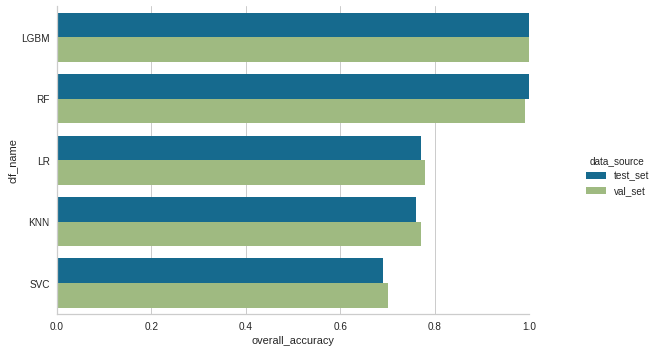

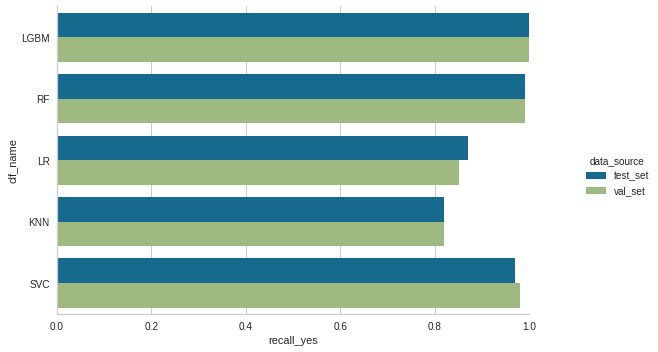

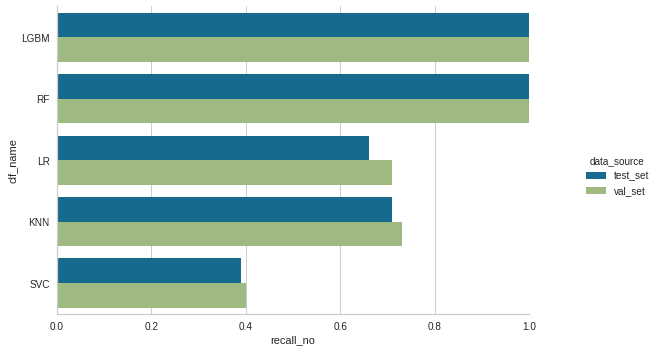

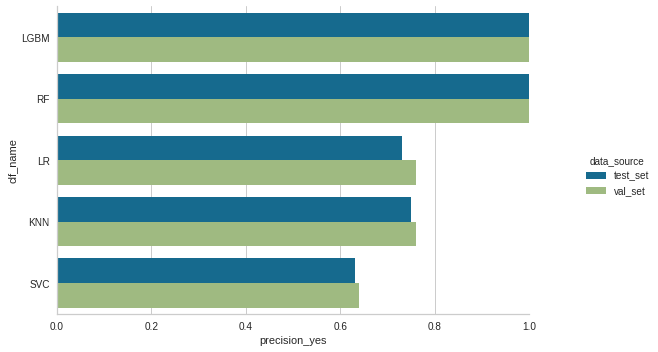

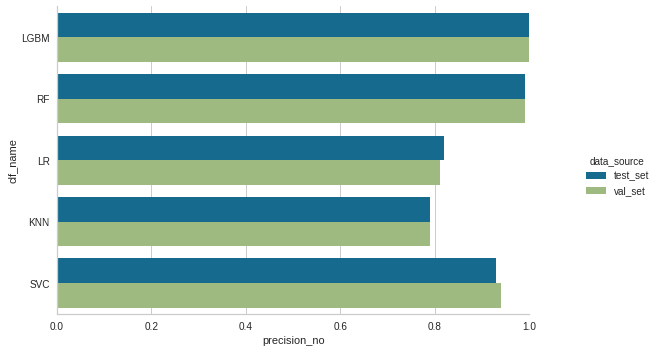

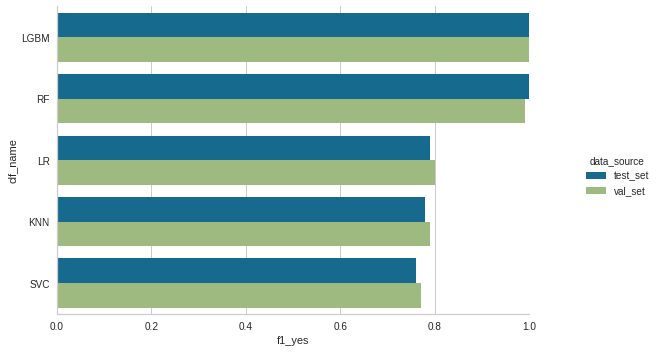

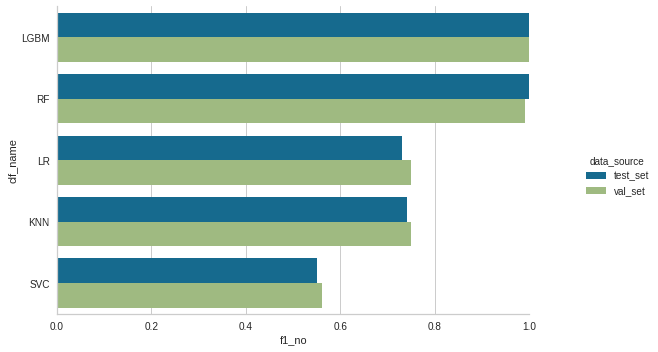

In [66]:
# comp_name = 'data-source'
fun_cv_val_test_comparison(clf_name_df,multi_clf_val_mean_df1,multi_clf_val_std_df1,multi_clf_test_report_df1,'data_source')

# Next steps
The models that were compared above have the default settings. No hyperparameters have been altered. To improve model performance, new variations of the models can be tested.

In [69]:
!cp "/content/drive/MyDrive/Colab Notebooks/finding_exoplanets_2.ipynb" ./

In [70]:
!jupyter nbconvert --to html "finding_exoplanets_2.ipynb"

[NbConvertApp] Converting notebook finding_exoplanets_2.ipynb to html
[NbConvertApp] Writing 640610 bytes to finding_exoplanets_2.html
